5300 Final
<br>
Nigel Krekeler
<br>
Dr. Furnstahl
<br>
Physics 5300
<br>
Final Project
<br>
April 29, 2022

# Double (and more) Pendulum

Defines a LagrangianPendulum class that is used to solve a double pendulum problem using Lagrange's equations

## Potential and Kinetic Energies

For a double pendulum, as per Taylor 11.37 and 11.38, the potential energy U and the kinetic energy T for two masses $m_1$ and $m_2$ (where $m_1$ is connected to the ceiling) with generalized coordinates $\phi_1$ and $\phi_2$ and lengths $L_1$ and $L_2$ are:

$\begin{align}
   U(\phi_1, \phi_2) = (m_1 + m_2) g L_1 (1-\cos{\phi_1})
   +m_2 g L_2 (1-\cos{\phi_2})
\end{align}$

$\begin{align}
   T = \frac{1}{2}(m_1 + m_2) L_1^2 \dot\phi_1^2
   +m_2 L_1 L_2 \dot\phi_1 \dot\phi_2\cos{(\phi_1-\phi_2)}
   +\frac{1}{2} m_2 L_2^2 \dot\phi_2^2
\end{align}$


## Euler-Lagrange equation

For this double pendulum, the Lagrangian is therefore:

$\begin{align}
  \mathcal{L} = T - U
\end{align}$
$\begin{align}
= \frac{1}{2}(m_1 + m_2) L_1^2 \dot\phi_1^2
   +m_2 L_1 L_2 \dot\phi_1 \dot\phi_2\cos{(\phi_1-\phi_2)}
   +\frac{1}{2} m_2 L_2^2 \dot\phi_2^2
   -(m_1 + m_2) g L_1 (1-\cos{\phi_1})
   -m_2 g L_2 (1-\cos{\phi_2})
\end{align}$

And the Euler-Lagrange equations are

$\begin{align}
 \frac{d}{dt}\frac{\partial\mathcal{L}}{\partial \dot\phi_i} = \frac{\partial\mathcal L}{\partial\phi_i}
 \quad\Longrightarrow\quad
\end{align}$

$\begin{align}
(m_1+m_2)L_1 \ddot\phi_1+m_2L_2[\ddot\phi_2 \cos{(\phi_1-\phi_2)} - \dot\phi_2 (\dot\phi_1-\dot\phi_2) \sin{(\phi1-\phi2)}] = 
-m_2L_2\dot\phi_1\dot\phi_2 \sin{(\phi_1-\phi_2)} - 
(m_1+m_2)g\sin{\phi_1}
\end{align}$

and

$\begin{align}
(m_1+m_2)L_2 \ddot\phi_2+m_2L_1[\ddot\phi_1 \cos{(\phi_1-\phi_2)} - \dot\phi_1 (\dot\phi_1-\dot\phi_2) \sin{(\phi1-\phi2)}] = 
m_2L_1\dot\phi_1\dot\phi_2 \sin{(\phi_1-\phi_2)} - 
m_2g\sin{\phi_2}
\end{align}$

After some algebra:

$\begin{align}
(m_1+m_2)L_1 \ddot\phi_1+m_2 L_2 \ddot\phi_2\cos{(\phi_1-\phi_2)}+m_2L_2\dot\phi_2^2\sin{(\phi_1-\phi_2)}+(m_1+m_2)g\sin{\phi_1}=0
\end{align}$

$\begin{align}
m_2L_2\ddot\phi_2+m_2L_1\ddot\phi_1\cos{(\phi_1-\phi_2)}-m_2L_1\dot\phi_1^2\sin{(\phi_1-\phi_2)}+m_2g\sin{phi_2}=0
\end{align}$

Some more algebra leads to:

$\tiny\begin{align}
\ddot\phi_1 = \frac{m_2g\sin{\phi_2}\cos{(\phi_1-\phi_2)}-m_2\sin{(\phi_1-\phi_2)}[L_1\dot\phi_1^2\cos{(\phi_1-\phi_2)}+L_2\dot\phi_2^2]-(m_1+m_2)g\sin{\phi_1}}{L_1[m_1+m_2\sin^2{(\phi_1-\phi_2)}}
\end{align}$

and

$\tiny\begin{align}
\ddot\phi_2 = \frac{(m_1+m_2)[L_1\dot\phi_1^2\sin{(\phi_1-\phi_2)}-g\sin{\phi_2}+g\sin{\phi_1}\cos{(\phi_1-\phi_2)}]+m_2L_2\dot\phi_2^2\sin{(\phi_1-\phi_2)}\cos{(\phi_1-\phi_2)}}{L_1[m_1+m_2\sin^2{(\phi_1-\phi_2)}}
\end{align}$

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt

## Pendulum class and utility functions

In [3]:
class LagrangianPendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a double pendulum (no driving or damping).
     
    Parameters
    ----------
    L1 : float
        length of the first pendulum
    L2 : float
        length of the second pendulum
    g : float
        gravitational acceleration at the earth's surface
    m1 : float
        mass of first pendulum
    m2 : float
        mass of second pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2=1., m1=1., m2=1., g=1.):
        self.L1 = L1
        self.L2 = L2
        self.g = g
        self.m1 = m1
        self.m2 = m2
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi1/dt, d^2phi1/dt^2, dphi2/dt, d^2phi2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with y[0] = phi_1(t) and y[1] = dphi_1/dt
            and y[2] = phi_2(t) and y[3] = dphi_2/dt
            
        Returns
        -------
        
        """
        phi1, phi1_dot, phi2, phi2_dot = y
        #and now using our formulas from above:
        phi1_ddot = (m2*g*np.sin(phi2)*np.cos(phi1-phi2)\
                     -m2*np.sin(phi1-phi2)*(L1*phi1_dot**2 *np.cos(phi1-phi2)\
                    +L2*phi2_dot**2)-(m1+m2)*g*np.sin(phi1))/(L1\
                    *(m1+m2*np.sin(phi1-phi2)**2))
       
        phi2_ddot = ((m1+m2)*(L1*phi1_dot**2 * np.sin(phi1-phi2)\
                    -g*np.sin(phi2)+g*np.sin(phi1)*np.cos(phi1-phi2))+m2\
                     *L2*phi2_dot**2 * np.sin(phi1-phi2)*np.cos(phi1-phi2))/(L1\
                    *(m1+m2*np.sin(phi1-phi2)**2))
        
        return phi1_dot, phi1_ddot, phi2_dot, phi2_ddot
    
    def solve_ode(self, t_pts, phi1_0, phi2_0, phi1_dot_0, phi2_dot_0, 
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi1_0, phi1_dot_0, phi2_0, phi2_dot_0] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi1, phi1_dot, phi2, phi2_dot = solution.y

        return phi1, phi1_dot, phi2, phi2_dot

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make Double pendulum plots 

In [6]:
# Labels for individual plot axes
phi1_vs_time_labels = (r'$t$', r'$\phi_1(t)$')
phi2_vs_time_labels = (r'$t$', r'$\phi_2(t)$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 90.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

#Initialize parameters
L1 = 1.
L2 = 1.
g = 1.
m1 = 1.
m2 = 1.

# Instantiate a pendulum 
p1 = LagrangianPendulum(L1=L1,L2=L2, g=g, m1=m1, m2=m2)


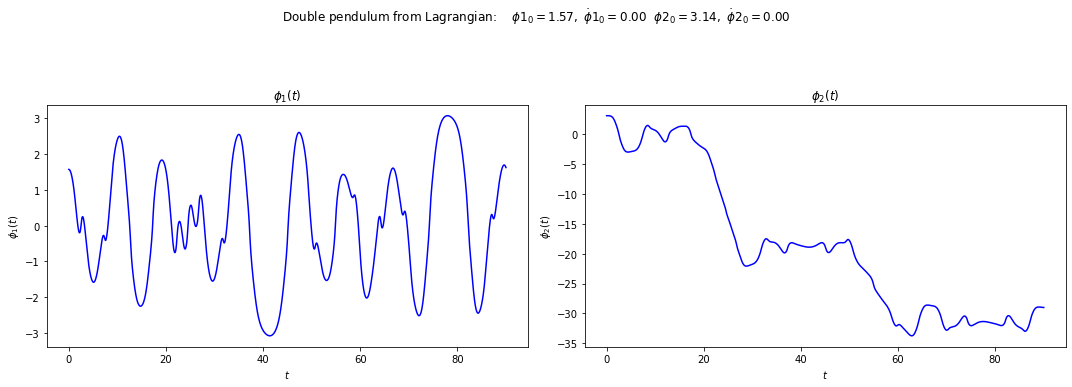

In [7]:
# initial conditions and solve for phi variables
phi1_0 = np.pi/2.
phi2_0 = np.pi
phi1_dot_0 = 0.
phi2_dot_0 = 0.
phi_1, phi_1_dot, phi_2, phi_2_dot = p1.solve_ode(t_pts, phi1_0,phi2_0, phi1_dot_0, phi2_dot_0)


# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Double pendulum from Lagrangian:  ' + \
                rf'  $\phi1_0 = {phi1_0:.2f},$' + \
                rf' $\dot\phi1_0 = {phi1_dot_0:.2f}$' + \
                rf'  $\phi2_0 = {phi2_0:.2f},$'+\
                rf' $\dot\phi2_0 = {phi2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,2,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
            axis_labels=phi1_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi_1(t)$', 
            ax=ax_a)    
                              
# second plot: phi_dot plot 
ax_b = fig.add_subplot(1,2,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
            axis_labels=phi2_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi_2(t)$', 
            ax=ax_b)    


fig.tight_layout()

## Now to test for chaos:

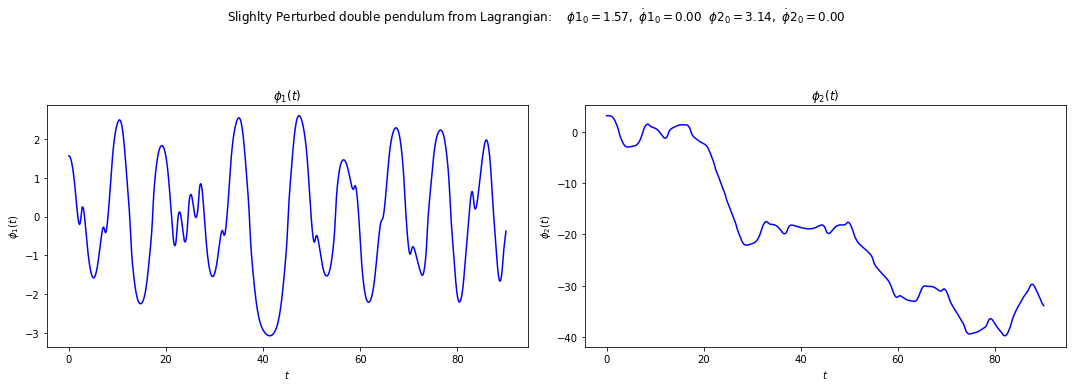

In [8]:
## create another pendulum that starts just a little bit off:
phi_1_new, phi_1_dot_new, phi_2_new, phi_2_dot_new = p1.solve_ode(t_pts, phi1_0, phi2_0, phi1_dot_0+.00001, phi2_dot_0)

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Slighlty Perturbed double pendulum from Lagrangian:  ' + \
                rf'  $\phi1_0 = {phi1_0:.2f},$' + \
                rf' $\dot\phi1_0 = {phi1_dot_0+.00001:.2f}$' + \
                rf'  $\phi2_0 = {phi2_0:.2f},$'+\
                rf' $\dot\phi2_0 = {phi2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,2,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_1_new[start : stop], 
            axis_labels=phi1_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi_1(t)$', 
            ax=ax_a)    
                              
# second plot: phi_dot plot 
ax_b = fig.add_subplot(1,2,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_2_new[start : stop], 
            axis_labels=phi2_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi_2(t)$', 
            ax=ax_b)    


fig.tight_layout()

Notice these are slightly off. Let's take a closer look at the discrepancy:

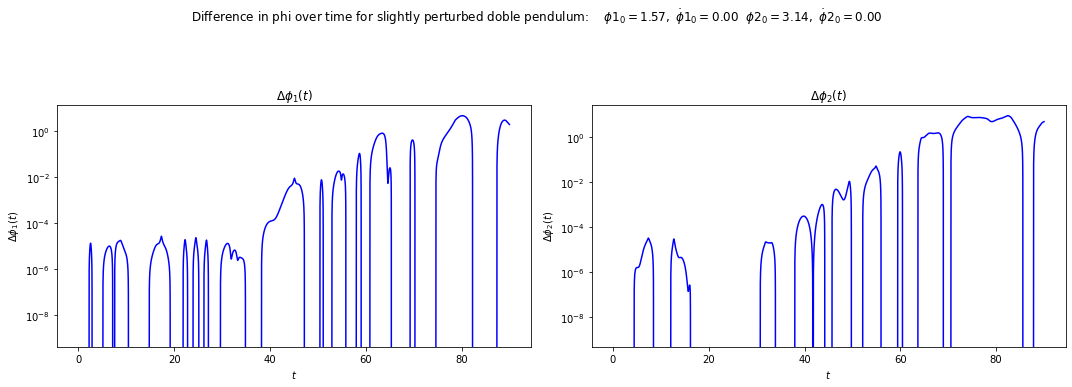

In [9]:
## Looking at the difference in each phi over time and plotting:

delta_phi1 = phi_1 - phi_1_new
delta_phi2 = phi_2 - phi_2_new

#Some new labels
delta_phi1_vs_time_labels = (r'$t$', r'$\Delta\phi_1(t)$')
delta_phi2_vs_time_labels = (r'$t$', r'$\Delta\phi_2(t)$')

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Difference in phi over time for slightly perturbed doble pendulum:  ' + \
                rf'  $\phi1_0 = {phi1_0:.2f},$' + \
                rf' $\dot\phi1_0 = {phi1_dot_0+.00001:.2f}$' + \
                rf'  $\phi2_0 = {phi2_0:.2f},$'+\
                rf' $\dot\phi2_0 = {phi2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,2,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], delta_phi1[start : stop], 
            axis_labels=delta_phi1_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\Delta\phi_1(t)$', 
            ax=ax_a, semilogy=True)    
                              
# second plot: phi_dot plot 
ax_b = fig.add_subplot(1,2,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], delta_phi2[start : stop], 
            axis_labels=delta_phi2_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\Delta\phi_2(t)$', 
            ax=ax_b, semilogy = True)    


fig.tight_layout()

Clearly, we see that the two different double pendula get further appart as time progresses

# Gravitational Orbits in Cartesian Coordinates

Solves the two-body problem for gravitational attraction in Cartesian coordinates.
Note: must run the previous code, since stuff from it is carried over

$\begin{align}
  U = \frac{-G m_1 m_2}{r}
\end{align}$

Starting from Newton's Laws, we have:

$\begin{align}
  \vec{\ddot r_1} = \frac{G m_2}{|\vec r_{12}|^3} (\vec r_2 -\vec r_1)
\end{align}$

and 

$\begin{align}
  \vec{\ddot r_2} = \frac{G m_1}{|\vec r_{12}|^3} (\vec r_2 -\vec r_1)
\end{align}$

with

$\begin{align}
  \vec r_{12} \equiv \vec r_2 - \vec r_1
\end{align}$

Choosing our coordinates such that the orbit is in the xy plane and doing some algebra leads to:

$\begin{align}
  |\vec r_{12}|^3 = [(x_2-x_1)^2 + (y_2-y_1)^2]^{3/2}
\end{align}$

and

$\begin{align}
  \ddot x_1 = \frac{G m_2}{|\vec r_{12}|^3} (x_2-x_1)
\end{align}$

$\begin{align}
  \ddot y_1 = \frac{G m_2}{|\vec r_{12}|^3} (y_2-y_1)
\end{align}$

$\begin{align}
  \ddot x_2 = \frac{G m_1}{|\vec r_{12}|^3} (x_1-x_2)
\end{align}$

$\begin{align}
  \ddot y_2 = \frac{G m_1}{|\vec r_{12}|^3} (y_1-y_2)
\end{align}$

## GravitationalOrbits class and utility functions

In [10]:
class GravitationalOrbit:
    """
    This class solves for the motion of two-bodies
    interacting only through Newtonian gravity 
    
    Parameters
    ________________
    m1 : float
        Mass of object 1
    m2 : float
        Mass of object 2
    G : float
        Newton's G constant
        
    Methods
    _______________
    dz_dt(t, z)
        Returns the right hand side of the differential equation in the
        vector z, which contains coordinate information for both bodies,
        given time t and a given z vector
    
    solve_ode(self, t_pts, z_0, abserr=1.0e-8, relerr=1.0e-8)
        Returns the solution of the differential equation given initial conditions
    
    """
    
    def __init__(self, m1=1., m2=1., G=1.):
        self.m1 = m1
        self.m2 = m2
        self.G =G
    
        
    def dz_dt(self, t, z):
        """
        This function returns the right-hand side of the diffeq: 
        [dz/dt d^2z/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        z : float
            An 8-component vector with:
            z[0] = x1(t) and z[1] = x1_dot(t)
            z[2] = y1(t) and z[3] = y1_dot(t)
            z[4] = x2(t) and z[5] = x2_dot(t)
            z[6] = y2(t) and z[7] = y2_dot(t)
            
        """
        
        mag_r12 = np.sqrt((z[4]-z[0])**2 + (z[6]-z[2])**2)
        
        return [\
               z[1], self.G * self.m2*(z[4]-z[0])/mag_r12**3,\
               z[3], self.G * self.m2*(z[6]-z[2])/mag_r12**3,\
               z[5], self.G * self.m1*(z[0]-z[4])/mag_r12**3,\
               z[7], self.G * self.m1*(z[2]-z[6])/mag_r12**3,\
               ]
    
    
    def solve_ode(self, t_pts, z_0, 
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        """
        solution = solve_ivp(self.dz_dt, (t_pts[0], t_pts[-1]), 
                             z_0, t_eval=t_pts, method='RK23',
                             atol=abserr, rtol=relerr)
        x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = solution.y
        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot
 

    def solve_ode_Leapfrog(self, t_pts, z_0):
        """
        Solve the ODE given initial conditions with the Leapfrog method.
        """
        delta_t = t_pts[1] - t_pts[0]
        
        x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0 = z_0 
        
        # initialize the arrays with zeros
        num_t_pts = len(t_pts)
        
        x1 = np.zeros(num_t_pts)
        x1_dot = np.zeros(num_t_pts)
        x1_dot_half = np.zeros(num_t_pts)

        y1 = np.zeros(num_t_pts)
        y1_dot = np.zeros(num_t_pts)
        y1_dot_half = np.zeros(num_t_pts)
        
        x2 = np.zeros(num_t_pts)
        x2_dot = np.zeros(num_t_pts)
        x2_dot_half = np.zeros(num_t_pts)
        
        y2 = np.zeros(num_t_pts)
        y2_dot = np.zeros(num_t_pts)
        y2_dot_half = np.zeros(num_t_pts)
        
       
        # initial conditions
        x1[0] = x1_0
        x1_dot[0] = x1_dot_0
        
        y1[0] = y1_0
        y1_dot[0] = y1_dot_0
        
        x2[0] = x2_0
        x2_dot[0] = x2_dot_0
        
        y2[0] = y2_0
        y2_dot[0] = y2_dot_0
        
        # step through the differential equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            
            z = [x1[i], x1_dot[i], y1[i], y1_dot[i], x2[i], \
                x2_dot[i], y2[i], y2_dot[i]]
            dzdt = self.dz_dt(t, z)
            
            x1_dot_half[i] = x1_dot[i] + dzdt[1] * delta_t/2.
            x1[i+1] = x1[i] + x1_dot_half[i] * delta_t
            
            y1_dot_half[i] = y1_dot[i] + dzdt[3] * delta_t/2.
            y1[i+1] = y1[i] + y1_dot_half[i] * delta_t
            
            x2_dot_half[i] = x2_dot[i] + dzdt[5] * delta_t/2.
            x2[i+1] = x2[i] + x2_dot_half[i] * delta_t
            
            y2_dot_half[i] = y2_dot[i] + dzdt[7] * delta_t/2.
            y2[i+1] = y2[i] + y2_dot_half[i] * delta_t
            
            z = [x1[i+1], x1_dot[i], y1[i+1], y1_dot[i], x2[i+1], \
                x2_dot[i], y2[i+1], y2_dot[i]]
            dzdt = self.dz_dt(t, z)
        
            x1_dot[i+1] = x1_dot_half[i]+dzdt[1]*delta_t/2.
            y1_dot[i+1] = y1_dot_half[i]+dzdt[3]*delta_t/2.
            x2_dot[i+1] = x2_dot_half[i]+dzdt[5]*delta_t/2.
            y2_dot[i+1] = y2_dot_half[i]+dzdt[7]*delta_t/2.
        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot
    
    
    

    def energy(self, t_pts, z):
        """Evaluate the energy as a function of time"""
        T = m1*(z[1]**2 + z[3]**2)/2. + m2*(z[5]**2 +z[7]**2)/2.
        U = -self.G * self.m1 * self.m2 / np.sqrt((z[4]-z[0])**2 + (z[6]-z[2])**2)
        
        return T+U

In [11]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make Simple Plots of the Orbits

In [12]:
# Labels for individual plot axes
orbit_labels = (r'$x(t)$', r'$y(t)$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 10.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

#Initialize parameters
G = 1.
m1 = 1.
m2 = 5.

# Instantiate an orbit 
o1 = GravitationalOrbit(m1=m1, m2=m2, G=G)


In [13]:
#initial conditions
x1_0, x1_dot_0 = 1., -1.
y1_0, y1_dot_0 = 1., 1.
#choosing r2 and r2_dot such that the CM is at rest:
x2_0, x2_dot_0 = -(m1/m2)*x1_0, -(m1/m2)*x1_dot_0
y2_0, y2_dot_0 = -(m1/m2)*y1_0, -(m1/m2)*y1_dot_0

z_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]

x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = o1.solve_ode(t_pts, z_0)

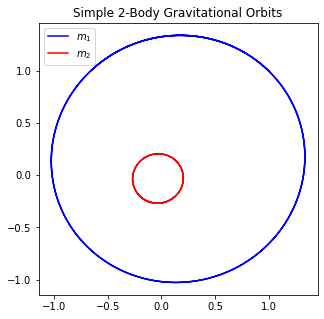

In [14]:
#plot:

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
start, stop =start_stop_indices(t_pts, t_start, t_end)
ax.plot(x1, y1, color = 'blue', label=r'$m_1$')
ax.plot(x2, y2, color = 'red', label=r'$m_2$')
ax.set_title('Simple 2-Body Gravitational Orbits')
ax.legend()

Now checking the limit from class, I let $m_1$ get much bigger than $m_2$:

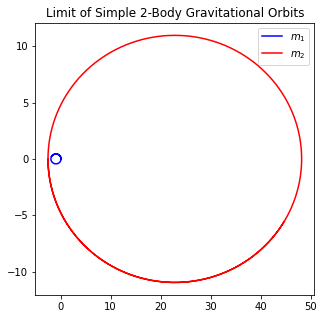

In [15]:
# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.00001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

#Initialize parameters
G = 20.
m1 = 25.
m2 = 1.

# Instantiate an orbit 
o1 = GravitationalOrbit(m1=m1, m2=m2, G=G)

#initial conditions
x1_0, x1_dot_0 = .1, 0.
y1_0, y1_dot_0 = 0., .75
#choosing r2 and r2_dot such that the CM is at rest:
x2_0, x2_dot_0 = -(m1/m2)*x1_0, -(m1/m2)*x1_dot_0
y2_0, y2_dot_0 = -(m1/m2)*y1_0, -(m1/m2)*y1_dot_0

z_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]

x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = o1.solve_ode(t_pts, z_0)

#plot:

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
start, stop =start_stop_indices(t_pts, t_start, t_end)
ax.plot(x1, y1, color = 'blue', label=r'$m_1$')
ax.plot(x2, y2, color = 'red', label=r'$m_2$')
ax.set_title('Limit of Simple 2-Body Gravitational Orbits')
ax.legend()

Which is as expected

## Show that the Leapfrog Algorithm Conserves Energy

In [16]:
# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

#Initialize parameters
G = 1.
m1 = 1.
m2 = 5.

# Instantiate an orbit 
o1 = GravitationalOrbit(m1=m1, m2=m2, G=G)

#initial conditions
x1_0, x1_dot_0 = 1., -1.
y1_0, y1_dot_0 = 1., 1.
#choosing r2 and r2_dot such that the CM is at rest:
x2_0, x2_dot_0 = -(m1/m2)*x1_0, -(m1/m2)*x1_dot_0
y2_0, y2_dot_0 = -(m1/m2)*y1_0, -(m1/m2)*y1_dot_0

z_0 = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]
#Prepare two sets of points
x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = o1.solve_ode(t_pts, z_0)
x1_LF, x1_dot_LF, y1_LF, y1_dot_LF, x2_LF, x2_dot_LF, y2_LF, y2_dot_LF = o1.solve_ode_Leapfrog(t_pts, z_0)

In [17]:
#Get Full Position Vectors

z=[x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot]
zLF=[x1_LF, x1_dot_LF, y1_LF, y1_dot_LF, x2_LF, x2_dot_LF, y2_LF, y2_dot_LF]

#Find Energy

E_tot_pts = o1.energy(t_pts, z)
E_tot_0 = E_tot_pts[0]
E_tot_rel_pts = np.abs((E_tot_pts - E_tot_0)/E_tot_0)

E_tot_pts_LF = o1.energy(t_pts, zLF)
E_tot_0_LF = E_tot_pts_LF[0]
E_tot_rel_pts_LF = np.abs((E_tot_pts_LF - E_tot_0_LF)/E_tot_0_LF)

And now we plot $\Delta$E(t)

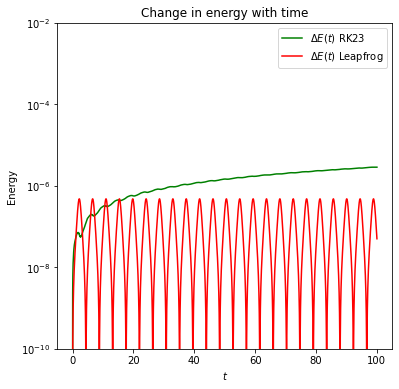

In [18]:
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(1,1,1)
ax.semilogy(t_pts, E_tot_rel_pts, color='green', label=r'$\Delta E(t)$ RK23')
ax.semilogy(t_pts, E_tot_rel_pts_LF, color='red', label=r'$\Delta E(t)$ Leapfrog')

ax.set_ylim(1.e-10, 1.e-2)    # (1.e-12, 5)
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'Energy')
ax.set_title('Change in energy with time')
ax.legend()

Clearly we can see that as time goes on the leapfrog algorithm conserves energy, but the scipy RK23 ode solver does not